In [34]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('yeastGEM.xml')

In [36]:
xyodict = {1: "r_2104", # xylitol transport
           2: "r_1719", # D-xylose transport
           3: "r_1093", # xylose reductase
           4: "r_1092"  # xylitol dehydrogenase
          }

In [51]:
medium_glu = model.medium  # 100% glucose as carbon source in the medium

medium_glu0 = model.medium  # 100% xylose as carbon source in the medium
with model: 
    medium_glu0['r_1714'] = 0.0
    medium_glu0['r_1718'] = 1.0

medium_glu50 = model.medium # 50% glucose and 50% xylose as carbon sources in the medium
with model: 
    medium_glu50['r_1714'] = 0.5
    medium_glu50['r_1718'] = 0.5
    
medium_glu75 = model.medium # 75% glucose and 25% xylose as carbon sources in the medium
with model: 
    medium_glu75['r_1714'] = 0.75
    medium_glu75['r_1718'] = 0.25
    
medium_glu25 = model.medium # 25% glucose and 75% xylose as carbon sources in the medium
with model: 
    medium_glu25['r_1714'] = 0.25
    medium_glu25['r_1718'] = 0.75
    
medium_glu60 = model.medium # 60% glucose and 40% xylose as carbon sources in the medium
with model: 
    medium_glu60['r_1714'] = 0.60
    medium_glu60['r_1718'] = 0.40

medium_glu40 = model.medium # 40% glucose and 60% xylose as carbon sources in the medium
with model: 
    medium_glu40['r_1714'] = 0.40
    medium_glu40['r_1718'] = 0.60

for element in medium_glu.keys():
    print(model.reactions.get_by_id(element).name, model.reactions.get_by_id(element), medium_glu[element])

ammonium exchange r_1654: s_0420[e] <=>  1000.0
D-glucose exchange r_1714: s_0565[e] <=>  1.0
H+ exchange r_1832: s_0796[e] <=>  1000.0
iron(2+) exchange r_1861: s_0925[e] <=>  1000.0
oxygen exchange r_1992: s_1277[e] <=>  1000.0
phosphate exchange r_2005: s_1324[e] <=>  1000.0
potassium exchange r_2020: s_1374[e] <=>  1000.0
sodium exchange r_2049: s_1438[e] <=>  1000.0
sulphate exchange r_2060: s_1468[e] <=>  1000.0
water exchange r_2100: s_0805[e] <=>  1000.0
chloride exchange r_4593: s_4200[e] <=>  1000.0
Cu2(+) exchange r_4594: s_4201[e] <=>  1000.0
Mn(2+) exchange r_4595: s_4202[e] <=>  1000.0
Zn(2+) exchange r_4596: s_4203[e] <=>  1000.0
Mg(2+) exchange r_4597: s_4204[e] <=>  1000.0
Ca(2+) exchange r_4600: s_4199[e] <=>  1000.0


In [97]:
with mutant_model:
    # model.medium = medium_glu  # 100% glucose as carbon source in the medium
    # model.medium = medium_glu0 # 100% xylose as carbon source in the medium
    # model.medium = medium_glu75 # 75% glucose and 25% xylose as carbon sources in the medium
    # model.medium = medium_glu50 # 50% glucose and 50% xylose as carbon sources in the medium
    # model.medium = medium_glu25 # 25% glucose and 75% xylose as carbon sources in the medium
    # model.medium = medium_glu40 # 60% glucose and 40% xylose as carbon sources in the medium
    model.medium = medium_glu60 # 40% glucose and 60% xylose as carbon sources in the medium
## Regulations
    model.reactions.r_1719.bounds = (0,1) # regulation for xylose transporter
    model.reactions.r_1093.bounds = (0,1) # regulation for xylose reductase
    model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
    model.reactions.r_2104.bounds = (0.75* medium_glu60['r_1718'],0.40) # regulation for xylitol transporter
    model.reactions.r_0889.bounds = (0,1) # 6-phosphogluconate dehydrogenase
    model.reactions.r_0466.bounds = (0,1) # Glucose-6-phosphate dehydrogenase
    
    ## solve model
    # model.objective = model.reactions.r_2104 # objective is maximum xylitol production
    solution3 = model.optimize()
    print(model.summary())
    for key in xyodict.keys():
        print(model.reactions.get_by_id(xyodict[key]).name, model.reactions.get_by_id(xyodict[key]).flux)
    print(model.reactions.r_2111.name, model.reactions.r_2111.flux)
    print(model.reactions.r_1714.name, model.reactions.r_1714.flux)
    print(model.reactions.r_1166.name, model.reactions.r_1166.flux)

Objective
1.0 r_2111 = 0.04691493348189254

Uptake
------
Metabolite Reaction      Flux  C-Number  C-Flux
 s_0420[e]   r_1654    0.3354         0   0.00%
 s_0565[e]   r_1714       0.6         6  70.59%
 s_0579[e]   r_1718       0.3         5  29.41%
 s_0796[e]   r_1832   0.02373         0   0.00%
 s_0925[e]   r_1861 1.426E-06         0   0.00%
 s_1277[e]   r_1992     1.349         0   0.00%
 s_1324[e]   r_2005    0.3053         0   0.00%
 s_1374[e]   r_2020 0.0001703         0   0.00%
 s_1438[e]   r_2049 0.0001863         0   0.00%
 s_1468[e]   r_2060  0.004035         0   0.00%
 s_4200[e]   r_4593 6.052E-05         0   0.00%
 s_4201[e]   r_4594 3.092E-05         0   0.00%
 s_4202[e]   r_4595 0.0001281         0   0.00%
 s_4203[e]   r_4596 3.509E-05         0   0.00%
 s_4204[e]   r_4597 5.829E-05         0   0.00%
 s_4199[e]   r_4600 1.018E-05         0   0.00%

Secretion
---------
Metabolite Reaction       Flux  C-Number  C-Flux
 s_0458[e]   r_1672     -1.578         1  51.26%
 s_0776

In [12]:
import numpy as np
import matplotlib.pyplot as plt


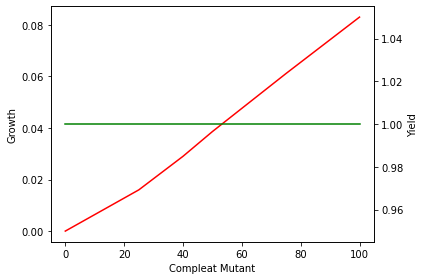

In [39]:
# Create data
x = [0, 25, 40, 50, 60, 75, 100]
y1 = [0, 0.016, 0.029, 0.0386, 0.0476, 0.0611, 0.083]
y2 = [1, 1, 1, 1, 1, 1, 1]


fig, ax1 = plt.subplots()

ax1.set_xlabel('Compleat Mutant')
ax1.set_ylabel('Growth')
ax1.plot(x, y1, c='r', label='Growth')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Yield')  # we already handled the x-label with ax1
ax2.plot(x, y2, c='g', label='Yield')

fig.tight_layout()  # otherwise the right y-label is slightly clipped







At this point it is checked that the each mutation is not lethal to the cell and that the combiantion of them are compatible when growth the cell in a medium with 50% glucose 50% Xylose, making sure that at least 75% of the Xylose in the media is converted to Xylitol. 
The combiantion of the different mutations it is comfirmed to not have effect on the growth rate, making it possible to combine all of them with out problem. Now it is necesary to find the medium that gives a better growth rate and still provides with a Xylose to Xylitol converion, in other words it is necessary to find the optimal growth medium. To do so the MediaLab.ipynb is used to it is possible to comment and uncomment the different lines of mutations to determine the growth rate of different mutants in all the designed medias.With this experiment the data necesary to create the graph bellow it is obtained. It can be seen that when increasing the ratio of glucose/xylose the growth increases and also that when having a media with 0 glucose and 100% of Xylose the growth is unfeasible. This is due to the fact that since the knock out of the XHD is part of the mutant being studied glucose is the only carbon source that can be used for growth, beacuse Xylitol can not loger be transformed to Xylulose and taken to the non-oxidative PPP (Figure 1). In addition the Yield of Xylitol is also calculated, and independently of the media used the Yield is alsway equal to 1, in other words all the Xylose uptake is used for Xylitol production. 
In a nutshell the optimal media should contian glucose in order to obtain cell growth. However, with this model is not possible to define a specific glucose/xylose since it would be necessary to know the relation of growth rate with the xylitol productivity. To get values of productivity ecYeast8 needs to be run. 